In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [3]:
# VADER

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [4]:
review1 = "Ordered java chip frappucinno and it was too sweet"

analyser.polarity_scores(review1)['compound']

0.4588

In [5]:
#Stanford NLP Sentiment

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')
res = nlp.annotate(review1,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
for s in res["sentences"]:
    print("%d: '%s': %s %s" % (
        s["index"],
        " ".join([t["word"] for t in s["tokens"]]),
        s["sentimentDistribution"], s["sentiment"]))

0: 'Ordered java chip frappucinno and it was too sweet': [0.1145625566855, 0.54292356251729, 0.22511476116278, 0.08501391980411, 0.03238519983033] Negative


In [6]:
#Mass production  - sNLP

text = "Steak sandwich was delicious.the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf."
print("Overall:\n",text)
res = nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
print("\nSentiment:",res['sentences'][0]['sentiment'])
print("Probability Distribution:")
print("Very Negative,\t   Negative,\t     Neutral,\t       Positive,\t Very Positive")
text = "Steak sandwich was delicious."
print(res['sentences'][0]['sentimentDistribution'])
print("\nSentence1:\n",text)
res = nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
print("\nSentiment:",res['sentences'][0]['sentiment'])
print("Probability Distribution:")
print("Very Negative,\t   Negative,\t     Neutral,\t       Positive,\t Very Positive")
print(res['sentences'][0]['sentimentDistribution'])
text = "the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf."
print("\nSentence2:\n",text)
res = nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
print("\nSentiment:",res['sentences'][0]['sentiment'])
print("Probability Distribution:")
print("Very Negative,\t   Negative,\t     Neutral,\t       Positive,\t Very Positive")
print(res['sentences'][0]['sentimentDistribution'])

Overall:
 Steak sandwich was delicious.the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf.

Sentiment: Verypositive
Probability Distribution:
Very Negative,	   Negative,	     Neutral,	       Positive,	 Very Positive
[0.0061021498739, 0.00778537690842, 0.10253026211897, 0.42187180321409, 0.46171040788462]

Sentence1:
 Steak sandwich was delicious.

Sentiment: Positive
Probability Distribution:
Very Negative,	   Negative,	     Neutral,	       Positive,	 Very Positive
[0.02537623043181, 0.0605944895721, 0.1309570172712, 0.56822740801947, 0.21484485470542]

Sentence2:
 the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf.

Sentiment: Positive
Probability Distribution:
Very Negative,	   Negative,	     Neutral,	       Positive,	 Very Positive
[0.00093343290854, 0.00080185991799, 0.00841579565213, 0.58314508653382, 0.40670382498752]


In [8]:
#Spacy

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
named_entity_recognizer = en_core_web_sm.load()

In [9]:
doc = named_entity_recognizer('I went to bar 101 and ordered bud light.')
print([(X.text, X.label_) for X in doc.ents])

[('101', 'CARDINAL')]


In [12]:
#Benepar

import benepar
benepar.download("benepar_en2")
parser = benepar.Parser("benepar_en2")

[nltk_data] Downloading package benepar_en2 to
[nltk_data]     /Users/nicowinata/nltk_data...
[nltk_data]   Package benepar_en2 is already up-to-date!


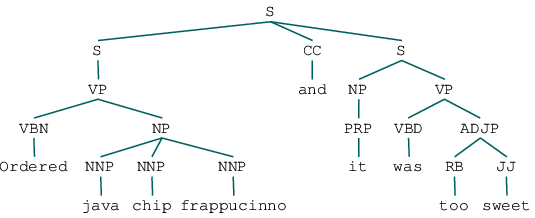

In [14]:
u = parser.parse(review1)
u

In [ ]:
#sNLP Parser

In [10]:
#Textblob

import textblob
from textblob import TextBlob

In [11]:
text = TextBlob("Wondee Siam is extremely good! But it serves Bud Light which is a mediocre beer.")
text.sentiment

Sentiment(polarity=0.2583333333333333, subjectivity=0.7666666666666666)